In [1]:
!nvidia-smi

Fri Apr  2 23:17:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
!unzip dl_vision.zip

Archive:  dl_vision.zip
   creating: dl_vision/
   creating: dl_vision/base/
  inflating: dl_vision/base/base_model.py  
  inflating: dl_vision/base/base_trainer.py  
 extracting: dl_vision/base/__init__.py  
   creating: dl_vision/base/__pycache__/
  inflating: dl_vision/base/__pycache__/base_model.cpython-38.pyc  
  inflating: dl_vision/base/__pycache__/base_trainer.cpython-38.pyc  
  inflating: dl_vision/base/__pycache__/__init__.cpython-38.pyc  
  inflating: dl_vision/config.yml    
   creating: dl_vision/data/
   creating: dl_vision/data_loader/
  inflating: dl_vision/data_loader/augmentations.py  
  inflating: dl_vision/data_loader/data_loaders.py  
 extracting: dl_vision/data_loader/__init__.py  
   creating: dl_vision/data_loader/__pycache__/
  inflating: dl_vision/data_loader/__pycache__/data_loaders.cpython-38.pyc  
  inflating: dl_vision/data_loader/__pycache__/transforms.cpython-38.pyc  
  inflating: dl_vision/data_loader/__pycache__/__init__.cpython-38.pyc  
   creating: d

In [5]:
%cd dl_vision/

/content/dl_vision


In [6]:
ls

base/       data/         logs/   runner/  trainer/
config.yml  data_loader/  model/  run.py   utils/


In [7]:
!cat /content/dl_vision/config.yml

name: CIFAR10
save_dir: saved/
seed: 9
target_device: cuda

arch:
  type: CIFAR10_ResNet18
  args: {}

transforms:
  type: CIFAR10Albumentations
  args: {}

data_loader:
  type: CIFAR10DataLoader
  args:
    batch_size: 128
    data_dir: data/
    num_workers: 4
    shuffle: True

criterion: cross_entropy_loss

optimizer:
  type: SGD
  args:
    lr: 0.001
    momentum: 0.9
    weight_decay: 0.0005

training:
  epochs: 50


In [8]:
# # # Create a config file¶

# %%writefile config.yml
# name: CIFAR10
# save_dir: saved/
# seed: 9
# target_device: cuda

# arch:
#   type: CIFAR10_ResNet18
#   args: {}

# transforms:
#   type: CIFAR10Albumentations
#   args: {}

# data_loader:
#   type: CIFAR10DataLoader
#   args:
#     batch_size: 128
#     data_dir: data/
#     num_workers: 4
#     shuffle: True

# criterion: cross_entropy_loss

# optimizer:
#   type: SGD
#   args:
#     lr: 0.001
#     momentum: 0.9
#     weight_decay: 0.0005

# training:
#   epochs: 5

In [9]:
# !python run.py --config=config.yml

import runner.runner as runners
from utils.config import load_config

config = load_config('config.yml')
# create a runner
runner = runners.Runner(config)

# setup train parameters
runner.setup_train(custom_model=True)

# print model summary
# runner.model_summary(input_size=(1, 28, 28))
runner.model_summary(input_size=(3, 32, 32))

[ 2021-04-02 23:17:39,048 -dl_vision - runner.runner ] INFO: Training Configuration
custom_model
[ 2021-04-02 23:17:39,053 -dl_vision - runner.runner ] INFO: {'arch': {'args': {}, 'type': 'CIFAR10_ResNet18'},
[ 2021-04-02 23:17:39,054 -dl_vision - runner.runner ] INFO:  'criterion': 'cross_entropy_loss',
[ 2021-04-02 23:17:39,055 -dl_vision - runner.runner ] INFO:  'data_loader': {'args': {'batch_size': 128,
[ 2021-04-02 23:17:39,056 -dl_vision - runner.runner ] INFO:                           'data_dir': 'data/',
[ 2021-04-02 23:17:39,058 -dl_vision - runner.runner ] INFO:                           'num_workers': 4,
[ 2021-04-02 23:17:39,059 -dl_vision - runner.runner ] INFO:                           'shuffle': True},
[ 2021-04-02 23:17:39,060 -dl_vision - runner.runner ] INFO:                  'type': 'CIFAR10DataLoader'},
[ 2021-04-02 23:17:39,061 -dl_vision - runner.runner ] INFO:  'name': 'CIFAR10',
[ 2021-04-02 23:17:39,062 -dl_vision - runner.runner ] INFO:  'optimizer': {'args


Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified
[ 2021-04-02 23:17:56,916 -dl_vision - runner.runner ] INFO: Intializing the Trainer
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]            

In [10]:
# Training the model
_ = runner.trainer.train()

[ 2021-04-02 23:17:57,072 -dl_vision - base.base_trainer ] INFO: Starting the Training.
[ 2021-04-02 23:17:57,074 -dl_vision - base.base_trainer ] INFO: Training the model for 50 epochs.



[ 2021-04-02 23:18:26,022 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 0, Average Loss 1.59269, Accuracy: 41.088%  (0.41088)
[ 2021-04-02 23:18:28,102 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 0, Average Loss 1.30637, Accuracy: 52.1%  (0.521)



[ 2021-04-02 23:18:56,928 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 1, Average Loss 1.22265, Accuracy: 55.756%  (0.55756)
[ 2021-04-02 23:18:59,015 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 1, Average Loss 1.12949, Accuracy: 59.36%  (0.5936)



[ 2021-04-02 23:19:27,866 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 2, Average Loss 1.03100, Accuracy: 62.992%  (0.62992)
[ 2021-04-02 23:19:29,951 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 2, Average Loss 0.93146, Accuracy: 66.85%  (0.6685)



[ 2021-04-02 23:19:58,646 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 3, Average Loss 0.89897, Accuracy: 67.884%  (0.67884)
[ 2021-04-02 23:20:00,709 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 3, Average Loss 0.79373, Accuracy: 71.64%  (0.7164)



[ 2021-04-02 23:20:29,314 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 4, Average Loss 0.79905, Accuracy: 71.562%  (0.71562)
[ 2021-04-02 23:20:31,394 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 4, Average Loss 0.77438, Accuracy: 72.68%  (0.7268)



[ 2021-04-02 23:21:00,090 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 5, Average Loss 0.72591, Accuracy: 74.352%  (0.74352)
[ 2021-04-02 23:21:02,193 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 5, Average Loss 0.72377, Accuracy: 75.16%  (0.7516)



[ 2021-04-02 23:21:31,031 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 6, Average Loss 0.66401, Accuracy: 76.794%  (0.76794)
[ 2021-04-02 23:21:33,117 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 6, Average Loss 0.64696, Accuracy: 78.17%  (0.7817)



[ 2021-04-02 23:22:01,883 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 7, Average Loss 0.60993, Accuracy: 78.562%  (0.78562)
[ 2021-04-02 23:22:03,948 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 7, Average Loss 0.56331, Accuracy: 80.44%  (0.8044)



[ 2021-04-02 23:22:32,733 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 8, Average Loss 0.57245, Accuracy: 79.962%  (0.79962)
[ 2021-04-02 23:22:34,817 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 8, Average Loss 0.54660, Accuracy: 81.16%  (0.8116)



[ 2021-04-02 23:23:03,580 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 9, Average Loss 0.53378, Accuracy: 81.502%  (0.81502)
[ 2021-04-02 23:23:05,648 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 9, Average Loss 0.54216, Accuracy: 81.18%  (0.8118)



[ 2021-04-02 23:23:34,426 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 10, Average Loss 0.50562, Accuracy: 82.184%  (0.82184)
[ 2021-04-02 23:23:36,499 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 10, Average Loss 0.50863, Accuracy: 82.3%  (0.823)



[ 2021-04-02 23:24:05,244 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 11, Average Loss 0.47983, Accuracy: 83.176%  (0.83176)
[ 2021-04-02 23:24:07,304 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 11, Average Loss 0.61116, Accuracy: 78.96%  (0.7896)



[ 2021-04-02 23:24:36,043 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 12, Average Loss 0.45396, Accuracy: 84.036%  (0.84036)
[ 2021-04-02 23:24:38,102 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 12, Average Loss 0.46250, Accuracy: 84.17%  (0.8417)



[ 2021-04-02 23:25:06,746 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 13, Average Loss 0.42982, Accuracy: 85.006%  (0.85006)
[ 2021-04-02 23:25:08,807 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 13, Average Loss 0.48024, Accuracy: 83.27%  (0.8327)



[ 2021-04-02 23:25:37,535 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 14, Average Loss 0.40815, Accuracy: 85.802%  (0.85802)
[ 2021-04-02 23:25:39,620 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 14, Average Loss 0.54034, Accuracy: 81.69%  (0.8169)



[ 2021-04-02 23:26:08,379 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 15, Average Loss 0.38997, Accuracy: 86.488%  (0.86488)
[ 2021-04-02 23:26:10,464 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 15, Average Loss 0.51233, Accuracy: 83.23%  (0.8323)



[ 2021-04-02 23:26:39,229 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 16, Average Loss 0.37026, Accuracy: 87.086%  (0.87086)
[ 2021-04-02 23:26:41,303 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 16, Average Loss 0.49448, Accuracy: 83.77%  (0.8377)



[ 2021-04-02 23:27:10,062 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 17, Average Loss 0.35706, Accuracy: 87.598%  (0.87598)
[ 2021-04-02 23:27:12,141 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 17, Average Loss 0.41027, Accuracy: 86.2%  (0.862)



[ 2021-04-02 23:27:40,885 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 18, Average Loss 0.34448, Accuracy: 87.798%  (0.87798)
[ 2021-04-02 23:27:42,972 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 18, Average Loss 0.42065, Accuracy: 86.22%  (0.8622)



[ 2021-04-02 23:28:11,759 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 19, Average Loss 0.33269, Accuracy: 88.338%  (0.88338)
[ 2021-04-02 23:28:13,849 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 19, Average Loss 0.40321, Accuracy: 86.12%  (0.8612)



[ 2021-04-02 23:28:42,702 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 20, Average Loss 0.31673, Accuracy: 88.982%  (0.88982)
[ 2021-04-02 23:28:44,783 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 20, Average Loss 0.42365, Accuracy: 85.74%  (0.8574)



[ 2021-04-02 23:29:13,557 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 21, Average Loss 0.30407, Accuracy: 89.442%  (0.89442)
[ 2021-04-02 23:29:15,631 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 21, Average Loss 0.44650, Accuracy: 85.23%  (0.8523)



[ 2021-04-02 23:29:44,394 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 22, Average Loss 0.29321, Accuracy: 89.78%  (0.8978)
[ 2021-04-02 23:29:46,460 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 22, Average Loss 0.41963, Accuracy: 86.02%  (0.8602)



[ 2021-04-02 23:30:15,305 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 23, Average Loss 0.28063, Accuracy: 90.31%  (0.9031)
[ 2021-04-02 23:30:17,395 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 23, Average Loss 0.41214, Accuracy: 86.46%  (0.8646)



[ 2021-04-02 23:30:46,368 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 24, Average Loss 0.26325, Accuracy: 90.908%  (0.90908)
[ 2021-04-02 23:30:48,443 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 24, Average Loss 0.40558, Accuracy: 86.36%  (0.8636)



[ 2021-04-02 23:31:17,253 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 25, Average Loss 0.25392, Accuracy: 91.074%  (0.91074)
[ 2021-04-02 23:31:19,336 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 25, Average Loss 0.43735, Accuracy: 86.13%  (0.8613)



[ 2021-04-02 23:31:48,136 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 26, Average Loss 0.25110, Accuracy: 91.23%  (0.9123)
[ 2021-04-02 23:31:50,219 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 26, Average Loss 0.39199, Accuracy: 87.53%  (0.8753)



[ 2021-04-02 23:32:18,946 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 27, Average Loss 0.24466, Accuracy: 91.356%  (0.91356)
[ 2021-04-02 23:32:21,025 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 27, Average Loss 0.40805, Accuracy: 86.59%  (0.8659)



[ 2021-04-02 23:32:49,814 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 28, Average Loss 0.23152, Accuracy: 91.912%  (0.91912)
[ 2021-04-02 23:32:51,902 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 28, Average Loss 0.36985, Accuracy: 88.17%  (0.8817)



[ 2021-04-02 23:33:20,693 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 29, Average Loss 0.22084, Accuracy: 92.218%  (0.92218)
[ 2021-04-02 23:33:22,749 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 29, Average Loss 0.39230, Accuracy: 87.77%  (0.8777)



[ 2021-04-02 23:33:51,577 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 30, Average Loss 0.21038, Accuracy: 92.558%  (0.92558)
[ 2021-04-02 23:33:53,667 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 30, Average Loss 0.40426, Accuracy: 86.85%  (0.8685)



[ 2021-04-02 23:34:22,413 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 31, Average Loss 0.20743, Accuracy: 92.768%  (0.92768)
[ 2021-04-02 23:34:24,499 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 31, Average Loss 0.42111, Accuracy: 86.37%  (0.8637)



[ 2021-04-02 23:34:53,290 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 32, Average Loss 0.20034, Accuracy: 93.01%  (0.9301)
[ 2021-04-02 23:34:55,388 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 32, Average Loss 0.36835, Accuracy: 88.42%  (0.8842)



[ 2021-04-02 23:35:24,180 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 33, Average Loss 0.19608, Accuracy: 93.12%  (0.9312)
[ 2021-04-02 23:35:26,262 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 33, Average Loss 0.37572, Accuracy: 88.13%  (0.8813)



[ 2021-04-02 23:35:55,074 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 34, Average Loss 0.19303, Accuracy: 93.278%  (0.93278)
[ 2021-04-02 23:35:57,154 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 34, Average Loss 0.38319, Accuracy: 88.13%  (0.8813)



[ 2021-04-02 23:36:25,929 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 35, Average Loss 0.18476, Accuracy: 93.564%  (0.93564)
[ 2021-04-02 23:36:28,014 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 35, Average Loss 0.37502, Accuracy: 88.06%  (0.8806)



[ 2021-04-02 23:36:56,891 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 36, Average Loss 0.18077, Accuracy: 93.6%  (0.936)
[ 2021-04-02 23:36:58,987 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 36, Average Loss 0.38564, Accuracy: 88.0%  (0.88)



[ 2021-04-02 23:37:27,955 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 37, Average Loss 0.16698, Accuracy: 94.174%  (0.94174)
[ 2021-04-02 23:37:30,040 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 37, Average Loss 0.36838, Accuracy: 88.55%  (0.8855)



[ 2021-04-02 23:37:58,820 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 38, Average Loss 0.16658, Accuracy: 94.16%  (0.9416)
[ 2021-04-02 23:38:00,904 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 38, Average Loss 0.40855, Accuracy: 87.75%  (0.8775)



[ 2021-04-02 23:38:29,660 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 39, Average Loss 0.16082, Accuracy: 94.32%  (0.9432)
[ 2021-04-02 23:38:31,766 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 39, Average Loss 0.36243, Accuracy: 88.53%  (0.8853)



[ 2021-04-02 23:39:00,549 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 40, Average Loss 0.15541, Accuracy: 94.544%  (0.94544)
[ 2021-04-02 23:39:02,644 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 40, Average Loss 0.35867, Accuracy: 88.77%  (0.8877)



[ 2021-04-02 23:39:31,475 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 41, Average Loss 0.15471, Accuracy: 94.506%  (0.94506)
[ 2021-04-02 23:39:33,553 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 41, Average Loss 0.38315, Accuracy: 88.41%  (0.8841)



[ 2021-04-02 23:40:02,303 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 42, Average Loss 0.14878, Accuracy: 94.798%  (0.94798)
[ 2021-04-02 23:40:04,398 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 42, Average Loss 0.37763, Accuracy: 88.75%  (0.8875)



[ 2021-04-02 23:40:33,120 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 43, Average Loss 0.14318, Accuracy: 95.008%  (0.95008)
[ 2021-04-02 23:40:35,200 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 43, Average Loss 0.44493, Accuracy: 86.82%  (0.8682)



[ 2021-04-02 23:41:03,896 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 44, Average Loss 0.13779, Accuracy: 95.186%  (0.95186)
[ 2021-04-02 23:41:05,994 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 44, Average Loss 0.36350, Accuracy: 89.17%  (0.8917)



[ 2021-04-02 23:41:34,750 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 45, Average Loss 0.13469, Accuracy: 95.244%  (0.95244)
[ 2021-04-02 23:41:36,826 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 45, Average Loss 0.40817, Accuracy: 88.2%  (0.882)



[ 2021-04-02 23:42:05,578 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 46, Average Loss 0.13094, Accuracy: 95.362%  (0.95362)
[ 2021-04-02 23:42:07,662 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 46, Average Loss 0.38176, Accuracy: 88.28%  (0.8828)



[ 2021-04-02 23:42:36,394 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 47, Average Loss 0.12884, Accuracy: 95.504%  (0.95504)
[ 2021-04-02 23:42:38,511 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 47, Average Loss 0.37911, Accuracy: 89.29%  (0.8929)



[ 2021-04-02 23:43:07,243 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 48, Average Loss 0.12705, Accuracy: 95.51%  (0.9551)
[ 2021-04-02 23:43:09,342 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 48, Average Loss 0.35312, Accuracy: 89.2%  (0.892)



[ 2021-04-02 23:43:38,151 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 49, Average Loss 0.12449, Accuracy: 95.724%  (0.95724)
[ 2021-04-02 23:43:40,221 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 49, Average Loss 0.36763, Accuracy: 89.32%  (0.8932)
Training Done base.


# Plots

[ 2021-04-02 23:43:40,231 -dl_vision - runner.runner ] INFO: Plotting the Metrics.


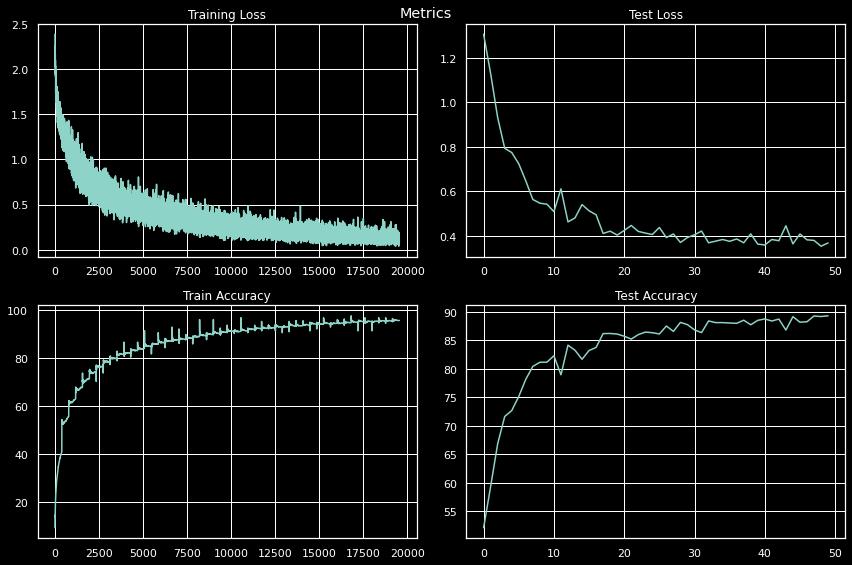

In [11]:
# plot the metrics
plt=runner.plot_metrics()

In [12]:
target_layers = ["layer1", "layer2", "layer3", "layer4"]

[ 2021-04-02 23:43:41,339 -dl_vision - runner.runner ] INFO: Plotting GradCAM.
[ 2021-04-02 23:43:41,557 -dl_vision - runner.runner ] INFO: Plotting for 5 Samples.
[ 2021-04-02 23:43:41,595 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer1
[ 2021-04-02 23:43:41,609 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer2
[ 2021-04-02 23:43:41,611 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer3
[ 2021-04-02 23:43:41,613 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer4


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


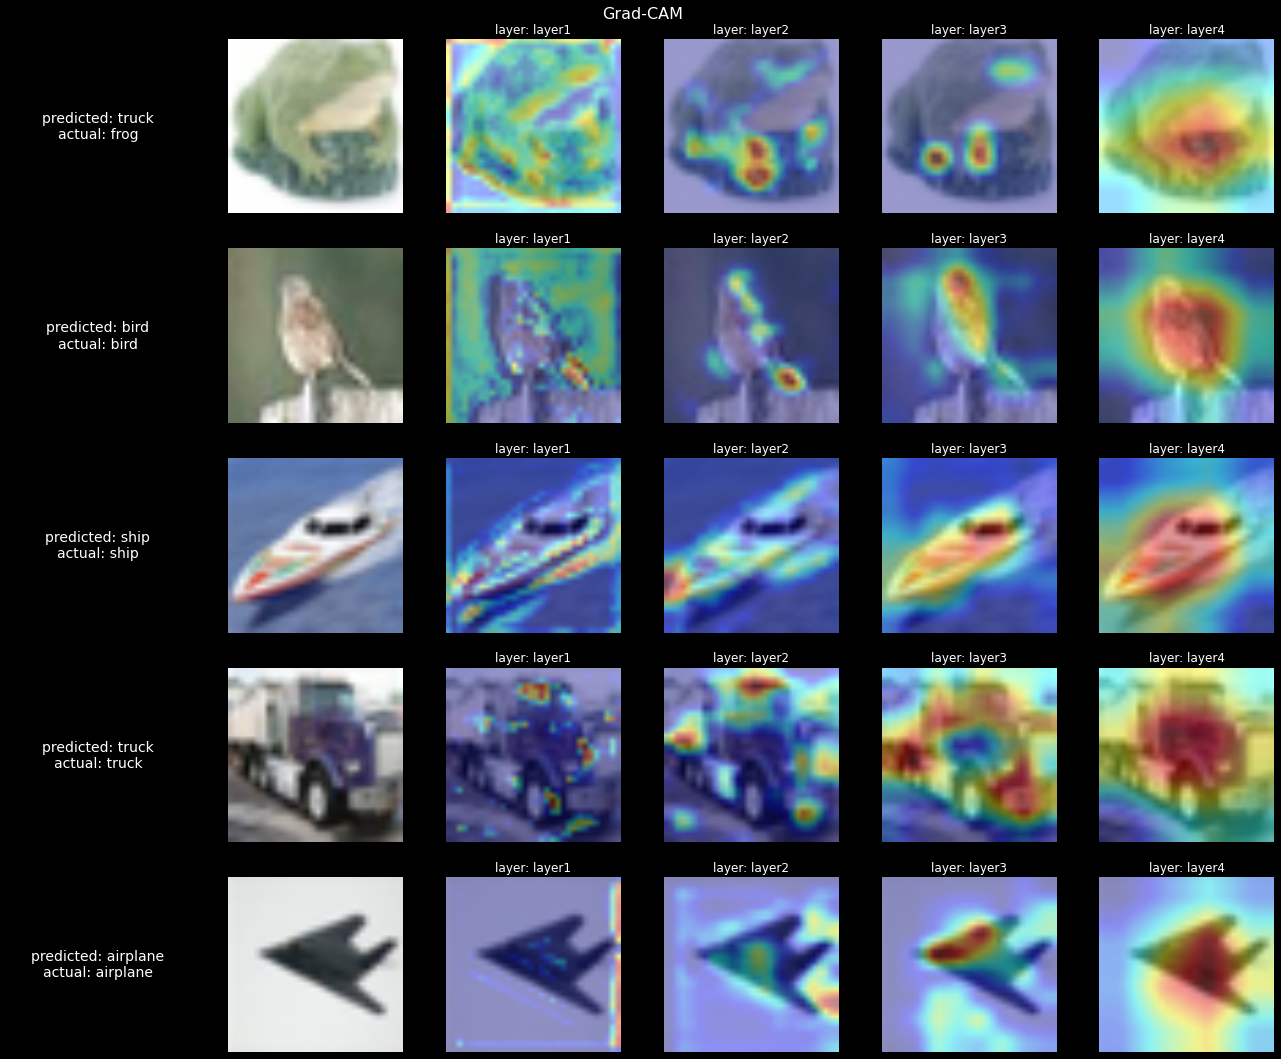

In [13]:
runner.plot_gradcam(target_layers=target_layers)

[ 2021-04-02 23:43:46,372 -dl_vision - runner.runner ] INFO: Model Misclassified Images.
[ 2021-04-02 23:43:48,511 -dl_vision - runner.runner ] INFO: Selecting 25 misclassified Samples.
[ 2021-04-02 23:43:48,524 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer1
[ 2021-04-02 23:43:48,526 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer2
[ 2021-04-02 23:43:48,528 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer3
[ 2021-04-02 23:43:48,530 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer4


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


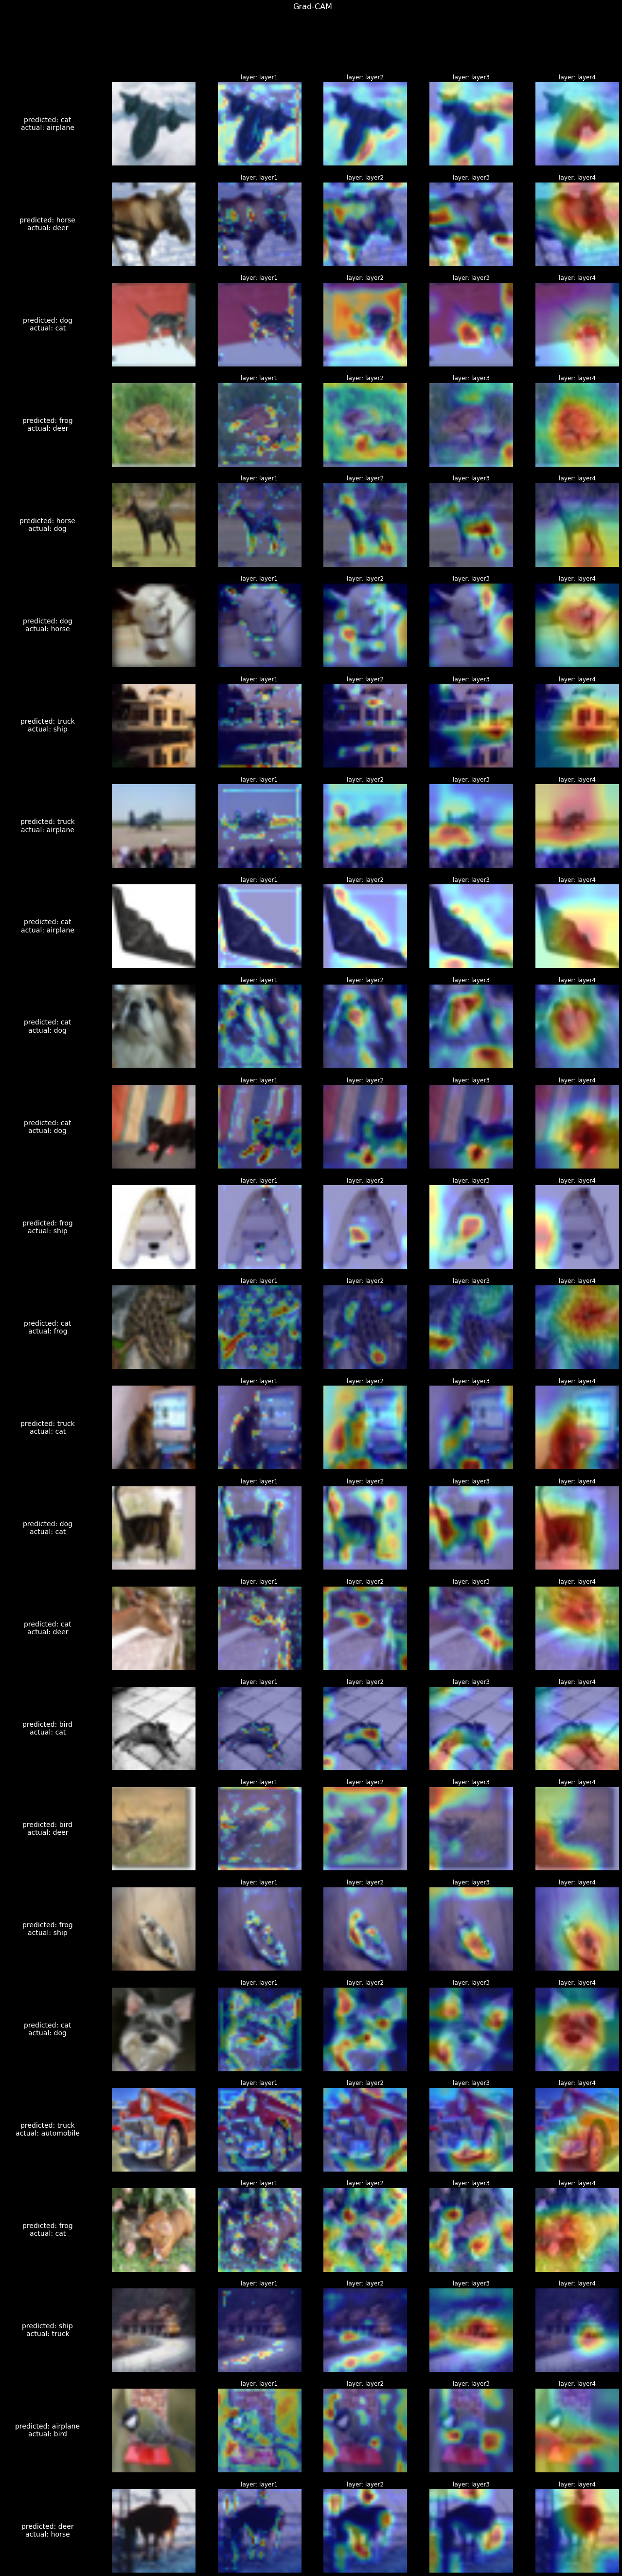

In [14]:
runner.plot_misclassified(target_layers=target_layers)